
# APPLE QUALITY PREDICTION

# AIM
Develop a machine learning model capable of predicting the quality of apples based on various features such as color, size, texture, and defects. The goal is to automate the process of sorting apples into different quality grades to improve efficiency and consistency in quality control.

# motivation
The motivation behind an Apple quality prediction machine learning project lies in enhancing agricultural efficiency and reducing waste. By accurately predicting the quality of apples, farmers can optimize harvest timing, minimize post-harvest losses, and ensure better product quality for consumers. This technology can contribute to sustainable farming practices and improve overall productivity in the agricultural sector.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\visha\Downloads\apple_quality (1).csv")
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [3]:
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [4]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [7]:
df.replace('', pd.NA, inplace=True)
# Drop NaN values
df = df.dropna()

# Display the DataFrame after dropping NaN values
print(df)

        A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3995  3995.0  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

           Acidity Quality 

# Explotory data analysis

In [8]:
df_num=df.select_dtypes(['int','float'])
df_num

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849
...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488


In [9]:
df_clean_cat=df.select_dtypes(['object'])
df_clean_cat

,Acidity,Quality
0,-0.491590483,good
1,-0.722809367,good
2,2.621636473,bad
3,0.790723217,good
4,0.501984036,good
...,...,...
3995,0.137784369,bad
3996,1.854235285,good
3997,-1.334611391,bad
3998,-2.229719806,good


# label encoding

In [10]:
from sklearn.preprocessing import LabelEncoder


In [11]:
le=LabelEncoder()

In [12]:
for i in df_clean_cat:
    df_clean_cat[i]=le.fit_transform(df_clean_cat[i])   #  convert the cat to label encoder
df_clean_cat

,Acidity,Quality
0,397,1
1,550,1
2,3543,0
3,2550,1
4,2344,1
...,...,...
3995,2070,0
3996,3177,1
3997,943,0
3998,1428,1


# VISUALIZATION

# Histrogram

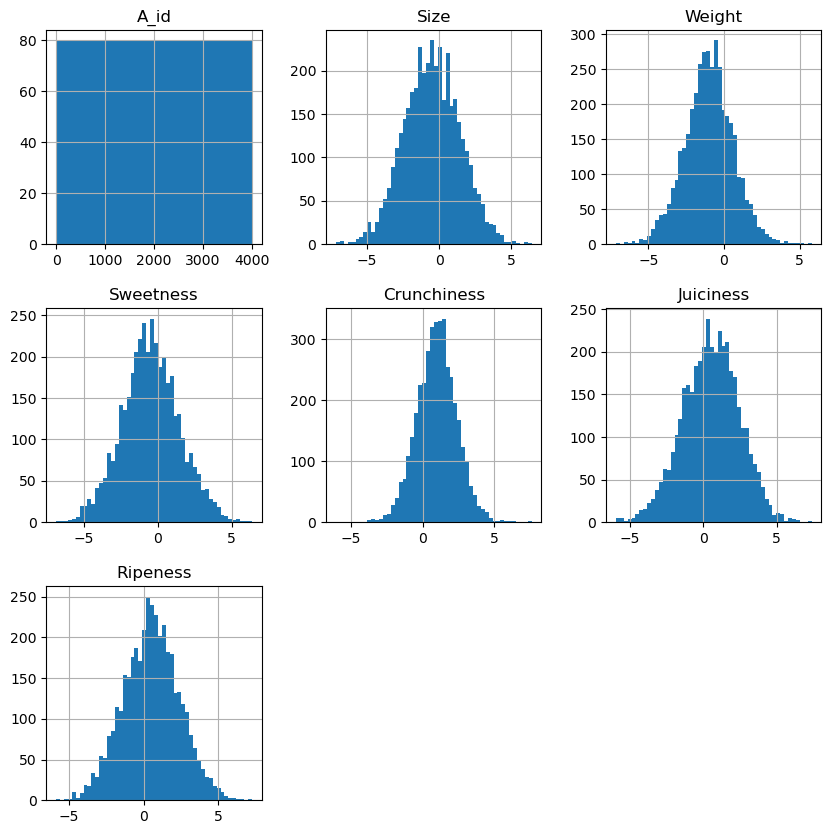

In [13]:
df.hist(figsize=(10,10),bins=50)
plt.show()

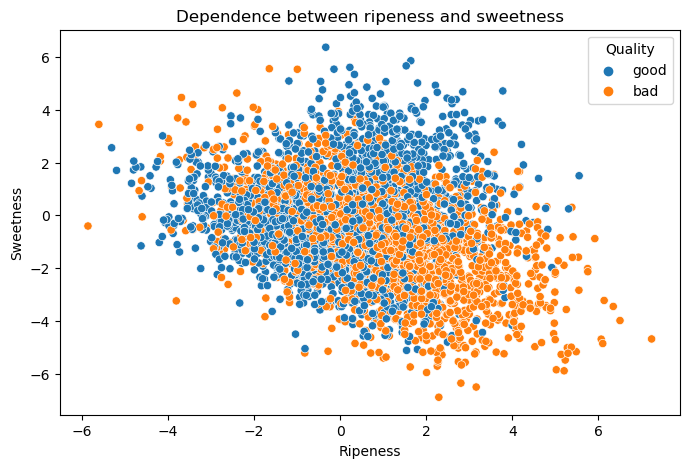

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Ripeness', y='Sweetness', hue='Quality')
plt.title("Dependence between ripeness and sweetness")
plt.show()

# Heatmap for expression correlation

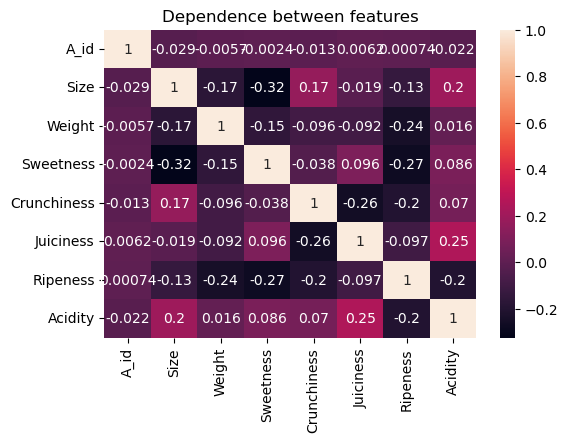

In [15]:
df_num = df.drop('Quality', axis=1)

plt.figure(figsize=(6, 4))
sns.heatmap(df_num.corr(), annot=True)
plt.title("Dependence between features")
plt.show() 

# Distplot

<Axes: xlabel='Acidity', ylabel='Density'>

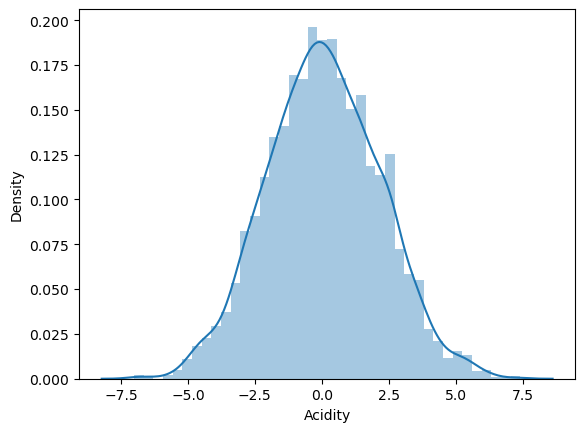

In [16]:
sns.distplot(df['Acidity'])

A_id              Axes(0.125,0.712609;0.168478x0.167391)
Size           Axes(0.327174,0.712609;0.168478x0.167391)
Weight         Axes(0.529348,0.712609;0.168478x0.167391)
Sweetness      Axes(0.731522,0.712609;0.168478x0.167391)
Crunchiness       Axes(0.125,0.511739;0.168478x0.167391)
Juiciness      Axes(0.327174,0.511739;0.168478x0.167391)
Ripeness       Axes(0.529348,0.511739;0.168478x0.167391)
dtype: object

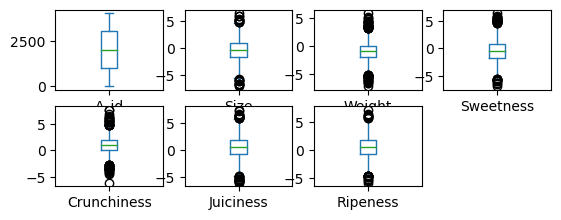

In [17]:
df.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

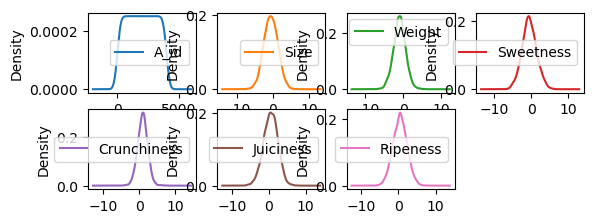

In [18]:
df.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

# Feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler


In [20]:
sc=StandardScaler()

In [21]:
x_scaled=sc.fit_transform(df_num)
x_scaled

array([[-1.73161785, -1.79842417, -0.95037339, ...,  0.69054495,
        -0.08987211, -0.26941526],
       [-1.73075182, -0.35906018, -1.15440431, ...,  0.17676683,
         0.1970196 , -0.37899737],
       [-1.7298858 ,  0.1094454 , -0.22575916, ...,  1.20542179,
        -0.28615565,  1.20604367],
       ...,
       [ 1.7298858 , -1.1056547 , -0.71690397, ...,  0.87437918,
         2.27595716, -0.66895013],
       [ 1.73075182, -1.81811235, -0.49290842, ...,  0.85454883,
        -0.15141937, -1.09317096],
       [ 1.73161785,  0.40540882, -0.45307081, ...,  0.39095445,
        -0.68021237,  0.72176064]])

In [22]:
df_scaled=pd.DataFrame(data=x_scaled,columns=df_num.columns)
print(df_scaled)

          A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  \
0    -1.731618 -1.798424 -0.950373   2.993421    -1.424150   0.690545   
1    -1.730752 -0.359060 -1.154404   2.127698     0.429746   0.176767   
2    -1.729886  0.109445 -0.225759  -0.652507    -0.946892   1.205422   
3    -1.729020 -0.079977 -0.800146   0.923916    -0.772399   1.619575   
4    -1.728154  0.968573 -0.191640   0.044164    -1.096894   1.305025   
...        ...       ...       ...        ...          ...        ...   
3995  1.728154  0.291729 -0.048594  -1.669449    -0.365345   0.614425   
3996  1.729020  0.108878  1.834105   0.137124    -1.159058  -0.252634   
3997  1.729886 -1.105655 -0.716904  -1.013784    -0.234036   0.874379   
3998  1.730752 -1.818112 -0.492908   1.459901    -0.845446   0.854549   
3999  1.731618  0.405409 -0.453071   0.304496    -1.525439   0.390954   

      Ripeness   Acidity  
0    -0.089872 -0.269415  
1     0.197020 -0.378997  
2    -0.286156  1.206044  
3    -2.087320 

In [23]:
df_new=pd.concat([df_num,df_clean_cat],axis=1)
df_new

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,397,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,550,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,3543,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,2550,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,2344,1
...,...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,2070,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,3177,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,943,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1428,1


# SPLITTING DATA INTO X AND Y

In [24]:
y=df_new.iloc[:,9:10]
y

,Quality
0,1
1,1
2,0
3,1
4,1
...,...
3995,0
3996,1
3997,0
3998,1


In [25]:
x=df_new.iloc[:,1:8]
x

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


# Importing the models

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [28]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()

In [29]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

# USING LOGISTIC REGRESSION

In [30]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       593
           1       0.75      0.76      0.76       607

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



LogisticRegression()

# USING DECISION TREE

In [31]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       593
           1       0.80      0.78      0.79       607

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.79      0.79      1200



DecisionTreeClassifier()

# USING SUPPORT VECTOR MACHINE

In [32]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       593
           1       0.90      0.90      0.90       607

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



SVC()

# USING K-Nearest Neighbors 

In [33]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       593
           1       0.90      0.90      0.90       607

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



KNeighborsClassifier()

# USING RAMDOM FOREST CLASSIFIER

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [35]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       593
           1       0.90      0.90      0.90       607

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



RandomForestClassifier(random_state=42)

# GRIDSEARCHCV USING RANDOM FOREST

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid=param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [38]:
gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [39]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [40]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       593
           1       0.90      0.90      0.90       607

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



RandomForestClassifier(random_state=42)

In [41]:
print("Best Parameters: ", gs.best_params_)
print("Best Score: ", gs.best_score_)

Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score:  0.8760714285714286


In [42]:
best_rf_model = gs.best_estimator_

In [43]:
y_pred = best_rf_model.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.8916666666666667


In [45]:
y_pred=rf.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1])

# Gridsearch using logisticregression

In [46]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [47]:
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [48]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [49]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best Score:  0.7453571428571428


In [50]:
best_logreg_model = grid_search.best_estimator_
y_pred = best_logreg_model.predict(x_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.7533333333333333


In [52]:
random_state=42
classifier = [DecisionTreeClassifier(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state)]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}

classifier_param=[dt_param_grid,
                 rf_param_grid,
                 logreg_param_grid]

In [53]:
from sklearn.model_selection import StratifiedKFold #This code performs grid search cross-validation with stratified k-fold splitting, optimizing classifiers from a list 'classifier' with corresponding parameter grids 'classifier_param' using accuracy as the scoring metric, and prints the best score for each classifier
cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8028571428571428
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.875
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.7442857142857142


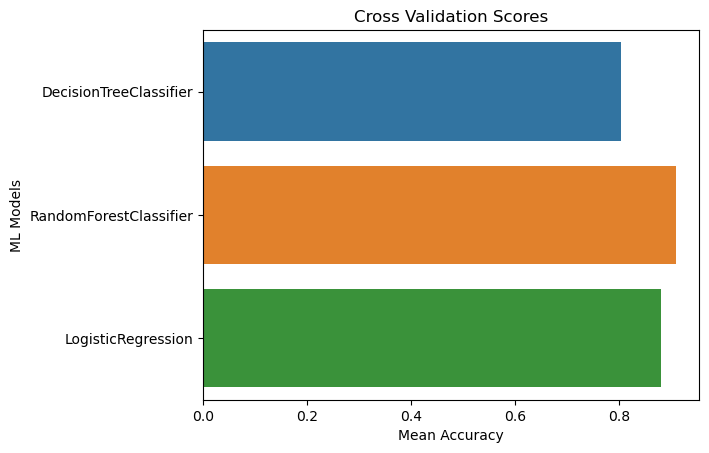

In [54]:
cv_results = pd.DataFrame({
    "Cross Validation Means": [0.8028571428571428, 0.9079713642213644,0.8802686615186616],
    "ML Models": ["DecisionTreeClassifier", "RandomForestClassifier", "LogisticRegression"]})
# Use sns.barplot with data as the DataFrame
g = sns.barplot(x="Cross Validation Means", y="ML Models", data=cv_results)
# Set labels and title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
# Show the plot
plt.show()

# Conclusion
In this project, we build various models like logistic regression, knn classifier,decision tree classifier & random forest classifier

A Random Forest gives the highest accuracy score of 90.00 percent among all the ML Models.

So for the Aaple Quality prediction Random Forest is best model